In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import copy

In [2]:
PURPLE = '#7130BE'
RASA = '#ab97e8'
LIGHT_RASA = PURPLE
DEEPPAVLOV = '#67A0CF'
LIGHT_DP = '#2778BB'

DIALOGFLOW = '#F3983E'
LIGHT_DF = '#EF6D37'
RED = '#e5f7eb'
YELLOW = '#9bdfb2'
GREEN = '#41c36c'

In [3]:
df = pd.read_csv("survey_data.csv")
df

,Timestamp,Consent Notice,Rasa: Was the bot able to complete the task of finding the desired restaurant,Rasa: Q1,Rasa: Q2,Rasa: Q3,Rasa: Q4,Rasa: Q5,Rasa: Q6,DeepPavlov: Was the bot able to complete the task of finding the desired restaurant,...,DialogFlow: Q6,Select the bots that you would use again,Rate the bots in order of usability (1 is the most usable) [Rasa Bot],Rate the bots in order of usability (1 is the most usable) [DeepPavlov Bot],Rate the bots in order of usability (1 is the most usable) [DialogFlow Bot],"Do you feel a difference between the bots? (If yes, please state why)",If there is any other information you wish to discuss regarding any of the bots please feel free to write it here,Gender,Age,Prior Experience
0,3/5/2021 10:38:21,I consent to my information being used in this...,Yes,2,2,3,3,1,2,"It did find a restaurant, but not the one I wa...",...,2,"Rasa Bot, DialogFlow Bot",2,1,2,DeepPavlov put the query results in the end an...,NaN,Female,21,3
1,3/5/2021 11:25:16,I consent to my information being used in this...,No,2,2,4,3,1,2,No,...,3,DialogFlow Bot,3,2,1,Yes. The way they responded was different.,Dialogflow was more usable because it filtered...,Female,23,2
2,3/5/2021 12:08:32,I consent to my information being used in this...,Yes,3,2,4,3,1,4,Yes but the answer was given in a peculiar fas...,...,5,Rasa Bot,1,3,2,Deep Pavlov was more intuitive to use as it ga...,If the DeepPavlov Bot gave more intuitive answ...,Male,22,1
3,3/5/2021 12:15:58,I consent to my information being used in this...,Yes,4,4,4,3,2,2,Yes,...,2,Rasa Bot,1,2,3,"Yes, Rasa Bot provided the most comprehensive ...",NaN,Male,21,3
4,3/5/2021 12:52:58,I consent to my information being used in this...,Yes,5,5,5,5,5,5,for some cuisines yes and for some no,...,5,Rasa Bot,1,3,2,There was a difference in how they responded a...,NaN,NaN,NaN,4
5,3/5/2021 16:48:22,I consent to my information being used in this...,No,2,2,3,1,4,2,No,...,4,DialogFlow Bot,3,2,1,"Yes, Each had a different way of responding. D...",NaN,Male,20s,3
6,3/5/2021 18:58:25,I consent to my information being used in this...,Yes,5,5,4,5,4,5,No,...,5,DialogFlow Bot,2,3,1,"Yes, one was incapable of finding restaurants ...",NaN,Female,21,1
7,3/6/2021 14:31:14,I consent to my information being used in this...,Yes,5,5,5,4,3,4,"It found Nandos, but didn't tell me where it w...",...,4,"Rasa Bot, DialogFlow Bot",1,3,2,"Yes, I found Rasa Bot and DialogFlow Bot were ...",Both Rasa Bot and DialogFlow bot gave me answe...,Female,21,2
8,3/6/2021 15:45:07,I consent to my information being used in this...,Yes,3,5,5,4,2,4,No,...,4,"Rasa Bot, DialogFlow Bot",2,3,1,The DeepPavlov implementation felt like a demo...,I want this in London!!!!!!!!,Male,24,4
9,3/6/2021 15:55:03,I consent to my information being used in this...,Yes,5,5,5,2,3,4,Mostly,...,1,Rasa Bot,1,3,2,"Yes, in the information given (eg. Rasa feels ...",NaN,Male,22,2


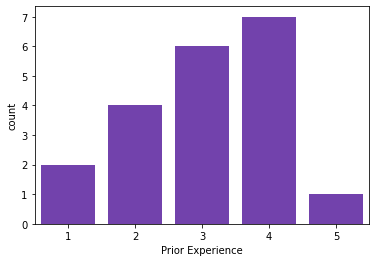

In [4]:
# TODO: make it purple
ax = sns.countplot(x="Prior Experience",data=df, color = PURPLE) 

In [5]:
def subcategorybar(X, vals, width=0.8):
    colours = [RASA, DEEPPAVLOV, DIALOGFLOW]
    legend = ['Rasa', 'DeepPavlov', 'DialogFlow']

    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", color = colours[i], label = legend[i])   
    plt.xticks(_X, X)

def compare_linkart(dff):
    bots = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
    rasa = []
    pav = []
    flow = []
    
    plt.figure(figsize=(10,7))

    for i in range(0, 6):
        rasa.append(dff['Rasa: Q'+str(i+1)].mean())
        pav.append(dff['DeepPavlov: Q'+str(i+1)].mean())
        flow.append(dff['DialogFlow: Q'+str(i+1)].mean())

    subcategorybar(bots, [rasa,pav,flow])
    plt.xlabel("Statements")
    plt.ylabel("Average Over Group")
    plt.legend()


    plt.show()
   

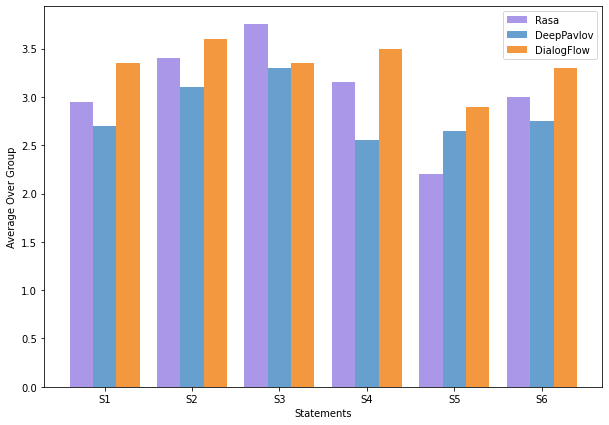

In [6]:
# FUll comparison
compare_linkart(df)

[[5, 6, 1, 2, 3, 7], [2, 4, 3, 2, 9, 1], [6, 4, 4, 3, 8, 5]]


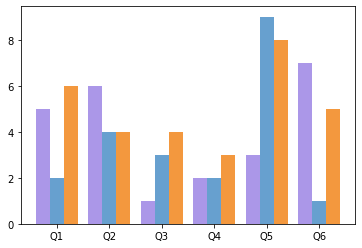

In [7]:
# specify the value with j 

bots = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']


rasa = []
pav = []
flow = []

j = 2

for i in range(0, 6):
    rasa.append(len(df[df['Rasa: Q'+str(i+1)] == j]))
    pav.append(len(df[df['DeepPavlov: Q'+str(i+1)] == j]))
    flow.append(len(df[df['DialogFlow: Q'+str(i+1)] == j]))
print([rasa,pav,flow])
    
subcategorybar(bots, [rasa,pav,flow])

plt.show()

In [8]:
# specify the value with j 

bots = ['Rasa', 'DeepPavlov', 'DialogFlow']
options = ['Yes', 'No', 'Other']

for bot in bots:

    conditions = [
        (df[bot + ': Was the bot able to complete the task of finding the desired restaurant'] == 'Yes'),
        (df[bot + ': Was the bot able to complete the task of finding the desired restaurant'] == 'No'),
        (df[bot + ': Was the bot able to complete the task of finding the desired restaurant'] != 'No') & (df[bot + ': Was the bot able to complete the task of finding the desired restaurant'] != 'Yes')
    ]

    values = ['Yes', 'No', 'Other']

    df[bot +': found val'] = np.select(conditions, values)


In [9]:
df

,Timestamp,Consent Notice,Rasa: Was the bot able to complete the task of finding the desired restaurant,Rasa: Q1,Rasa: Q2,Rasa: Q3,Rasa: Q4,Rasa: Q5,Rasa: Q6,DeepPavlov: Was the bot able to complete the task of finding the desired restaurant,...,Rate the bots in order of usability (1 is the most usable) [DeepPavlov Bot],Rate the bots in order of usability (1 is the most usable) [DialogFlow Bot],"Do you feel a difference between the bots? (If yes, please state why)",If there is any other information you wish to discuss regarding any of the bots please feel free to write it here,Gender,Age,Prior Experience,Rasa: found val,DeepPavlov: found val,DialogFlow: found val
0,3/5/2021 10:38:21,I consent to my information being used in this...,Yes,2,2,3,3,1,2,"It did find a restaurant, but not the one I wa...",...,1,2,DeepPavlov put the query results in the end an...,NaN,Female,21,3,Yes,Other,Yes
1,3/5/2021 11:25:16,I consent to my information being used in this...,No,2,2,4,3,1,2,No,...,2,1,Yes. The way they responded was different.,Dialogflow was more usable because it filtered...,Female,23,2,No,No,Yes
2,3/5/2021 12:08:32,I consent to my information being used in this...,Yes,3,2,4,3,1,4,Yes but the answer was given in a peculiar fas...,...,3,2,Deep Pavlov was more intuitive to use as it ga...,If the DeepPavlov Bot gave more intuitive answ...,Male,22,1,Yes,Other,Yes
3,3/5/2021 12:15:58,I consent to my information being used in this...,Yes,4,4,4,3,2,2,Yes,...,2,3,"Yes, Rasa Bot provided the most comprehensive ...",NaN,Male,21,3,Yes,Yes,No
4,3/5/2021 12:52:58,I consent to my information being used in this...,Yes,5,5,5,5,5,5,for some cuisines yes and for some no,...,3,2,There was a difference in how they responded a...,NaN,NaN,NaN,4,Yes,Other,Yes
5,3/5/2021 16:48:22,I consent to my information being used in this...,No,2,2,3,1,4,2,No,...,2,1,"Yes, Each had a different way of responding. D...",NaN,Male,20s,3,No,No,No
6,3/5/2021 18:58:25,I consent to my information being used in this...,Yes,5,5,4,5,4,5,No,...,3,1,"Yes, one was incapable of finding restaurants ...",NaN,Female,21,1,Yes,No,Yes
7,3/6/2021 14:31:14,I consent to my information being used in this...,Yes,5,5,5,4,3,4,"It found Nandos, but didn't tell me where it w...",...,3,2,"Yes, I found Rasa Bot and DialogFlow Bot were ...",Both Rasa Bot and DialogFlow bot gave me answe...,Female,21,2,Yes,Other,Yes
8,3/6/2021 15:45:07,I consent to my information being used in this...,Yes,3,5,5,4,2,4,No,...,3,1,The DeepPavlov implementation felt like a demo...,I want this in London!!!!!!!!,Male,24,4,Yes,No,Other
9,3/6/2021 15:55:03,I consent to my information being used in this...,Yes,5,5,5,2,3,4,Mostly,...,3,2,"Yes, in the information given (eg. Rasa feels ...",NaN,Male,22,2,Yes,Other,Other


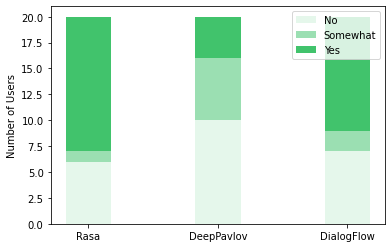

In [10]:
def desired_result_for_user(dff):
    bots = ['Rasa', 'DeepPavlov', 'DialogFlow']
    labels = ['No', 'Somewhat', 'Yes']

    vals = np.array([[0, 0, 0], [0, 0, 0],[0, 0, 0]])

    width = 0.35       # the width of the bars: can also be len(x) sequence
    vals[0] = [len(dff[dff['Rasa: Was the bot able to complete the task of finding the desired restaurant'] == options[1]]), len(dff[dff['DeepPavlov: Was the bot able to complete the task of finding the desired restaurant'] == options[1]]), len(dff[dff['DialogFlow: Was the bot able to complete the task of finding the desired restaurant'] == options[1]])]
    vals[1] = [len(dff[(dff['Rasa: Was the bot able to complete the task of finding the desired restaurant'] != options[0]) & (dff['Rasa: Was the bot able to complete the task of finding the desired restaurant'] != options[1])]), len(dff[(dff['DeepPavlov: Was the bot able to complete the task of finding the desired restaurant'] != options[0]) & (dff['DeepPavlov: Was the bot able to complete the task of finding the desired restaurant'] != options[1])]), len(dff[(dff['DialogFlow: Was the bot able to complete the task of finding the desired restaurant'] != options[0]) & (dff['DialogFlow: Was the bot able to complete the task of finding the desired restaurant'] != options[1])])]
    vals[2] = [len(dff[dff['Rasa: Was the bot able to complete the task of finding the desired restaurant'] == options[0]]), len(dff[dff['DeepPavlov: Was the bot able to complete the task of finding the desired restaurant'] == options[0]]), len(dff[dff['DialogFlow: Was the bot able to complete the task of finding the desired restaurant'] == options[0]])]

    color_list = [RED, YELLOW, GREEN]
    # 0--> No, 1 --> other, 2 --> Yes

    X = np.arange(vals.shape[1])
    for i in range(vals.shape[0]):
        plt.bar(bots, vals[i],width,
        bottom = np.sum(vals[:i], axis = 0),
        color = color_list[i % len(color_list)],
        label = labels[i % len(color_list)])
    
    plt.ylabel("Number of Users")
    plt.legend()
    plt.show()
desired_result_for_user(df)


Bot experience less than or equal to: 1


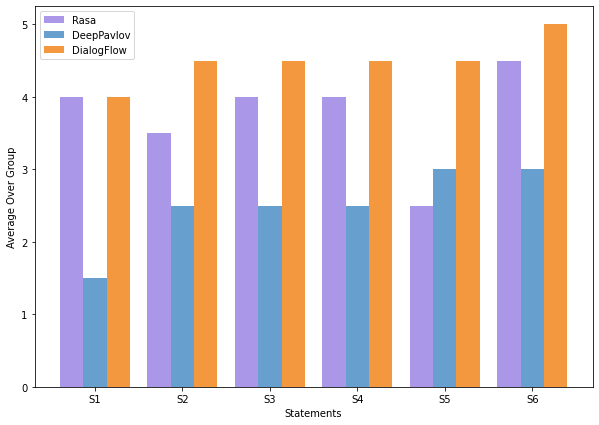



Bot experience less than or equal to: 2


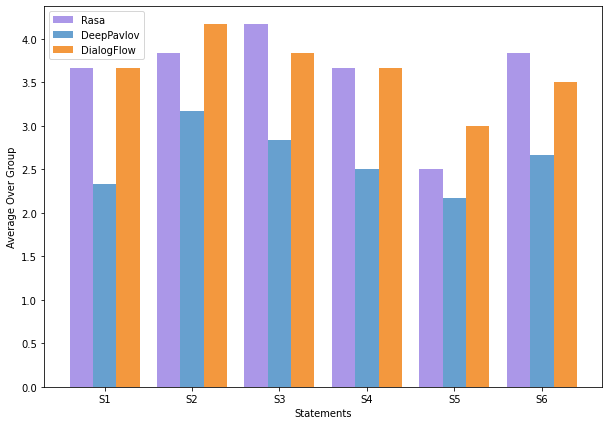



Bot experience less than or equal to: 3


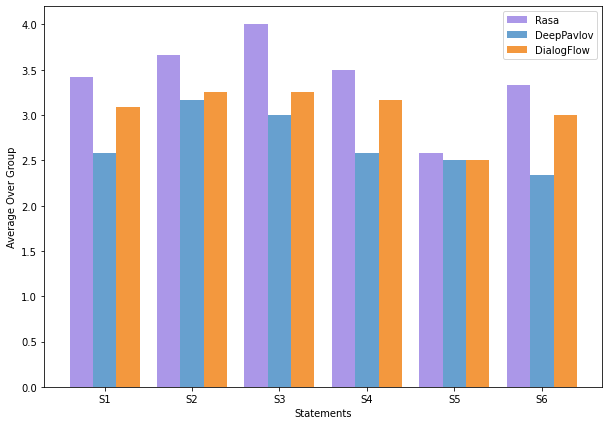



Bot experience less than or equal to: 4


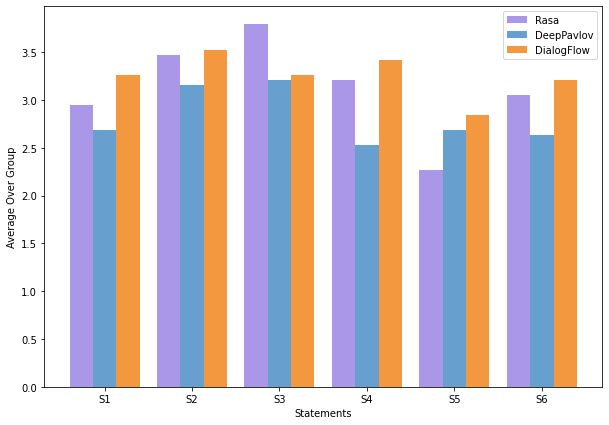



Bot experience less than or equal to: 5


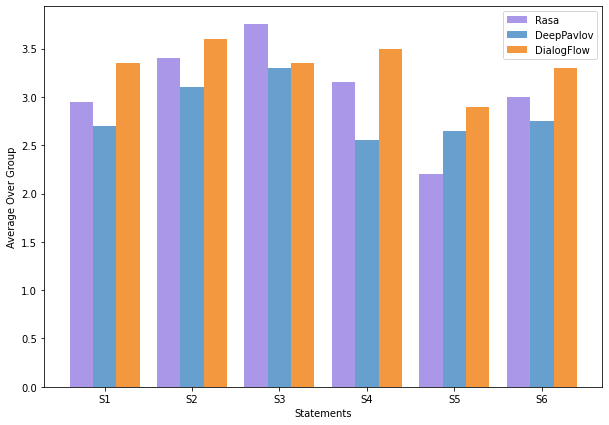

In [11]:
for i in range(0, 5):
    print("Bot experience less than or equal to: "+ str(i + 1))
    compare_linkart(df[df['Prior Experience'] <= i+1])
    print('\n')

Bot experience equal to: 1


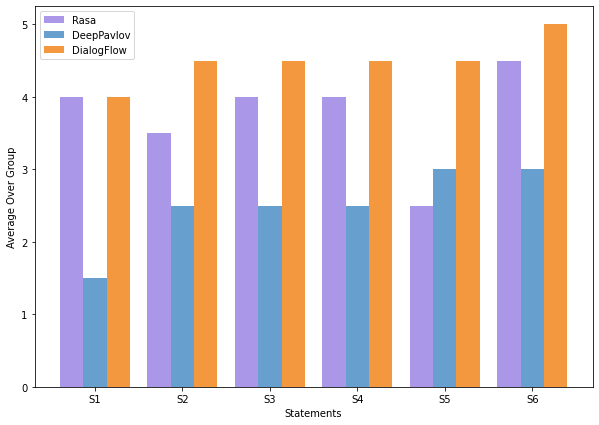



Bot experience equal to: 2


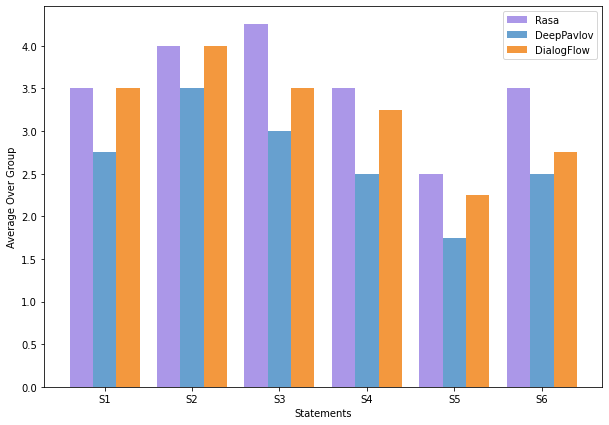



Bot experience equal to: 3


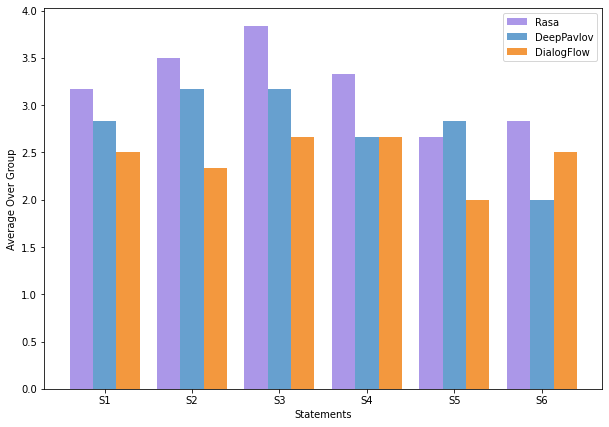



Bot experience equal to: 4


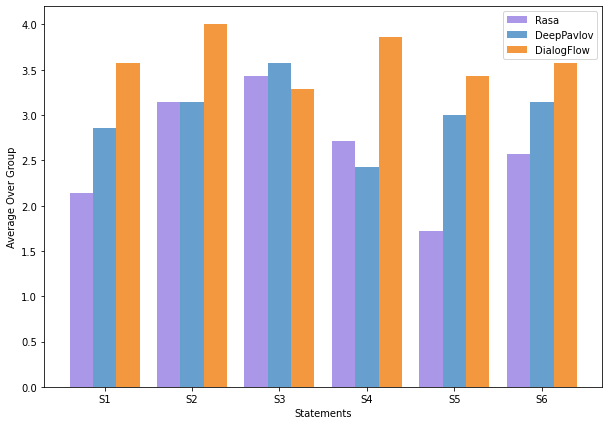



Bot experience equal to: 5


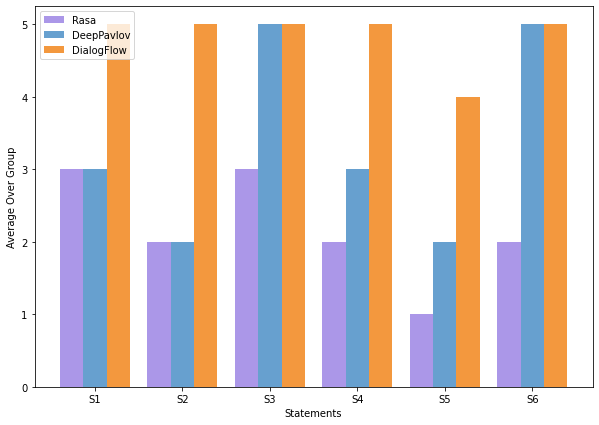

In [12]:
for i in range(0, 5):
    print("Bot experience equal to: "+ str(i + 1))
    compare_linkart(df[df['Prior Experience'] == i+1])
    print('\n')

Bot experience less than or equal to: 1


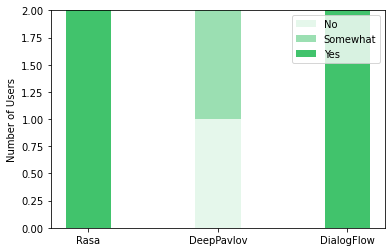



Bot experience less than or equal to: 2


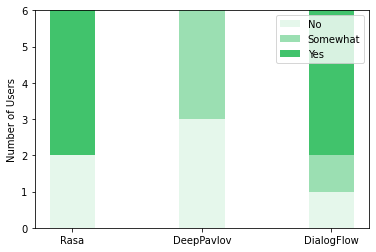



Bot experience less than or equal to: 3


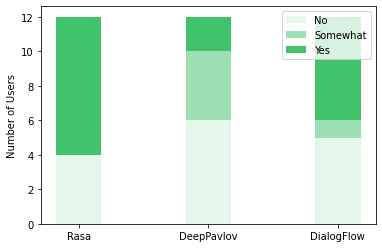



Bot experience less than or equal to: 4


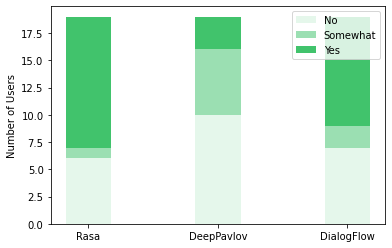



Bot experience less than or equal to: 5


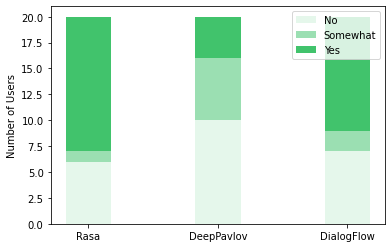

In [13]:
for i in range(0, 5):
    print("Bot experience less than or equal to: "+ str(i + 1))
    desired_result_for_user(df[df['Prior Experience'] <= i+1])
    print('\n')

Bot experience equal to: 1


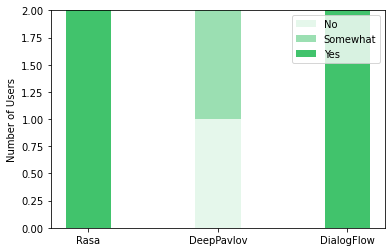



Bot experience equal to: 2


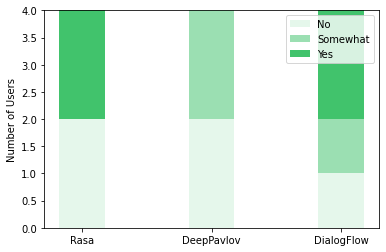



Bot experience equal to: 3


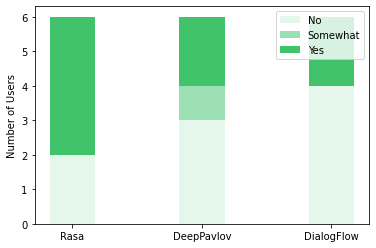



Bot experience equal to: 4


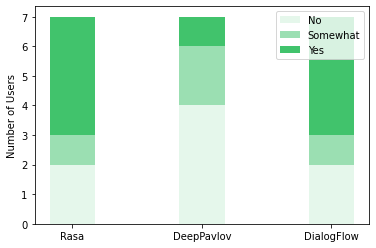



Bot experience equal to: 5


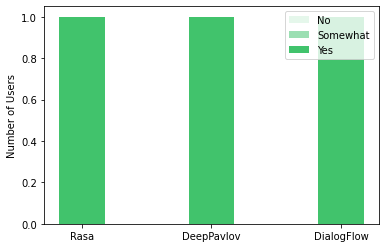

In [14]:
for i in range(0, 5):
    print("Bot experience equal to: "+ str(i + 1))
    desired_result_for_user(df[df['Prior Experience'] == i+1])
    print('\n')

Q1: It was easy for me to get the information I wanted.


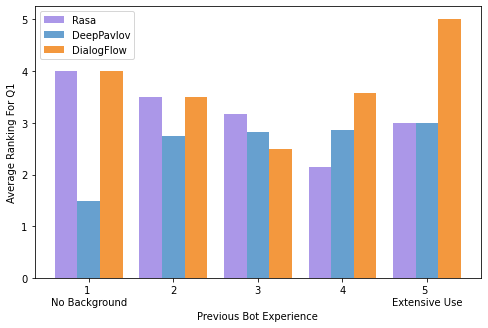

Q2: The bot was intuitive to you use and understand.


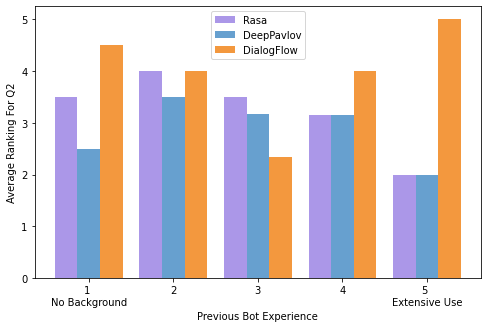

Q3: I trust the information given by this bot.


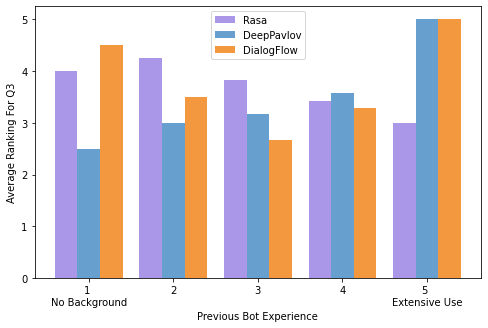

Q4: The conversation I had with this was coherent.


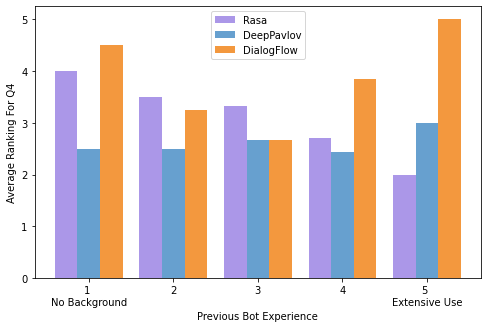

Q5: The bot responded well to random inputs.


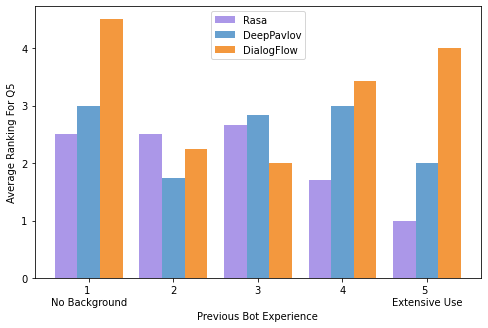

Q6: The bot understood the intents of my messages.


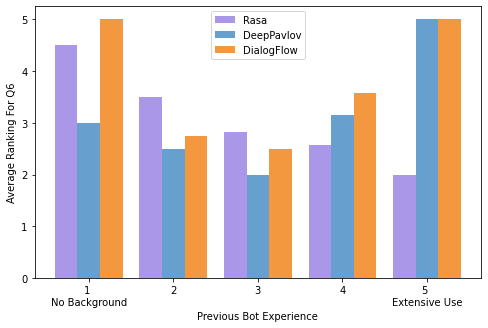

In [15]:
def compare_questions(dff):
    bots = ['Q1: It was easy for me to get the information I wanted.', 
            'Q2: The bot was intuitive to you use and understand.', 
            'Q3: I trust the information given by this bot.', 
            'Q4: The conversation I had with this was coherent.', 
            'Q5: The bot responded well to random inputs.', 
            'Q6: The bot understood the intents of my messages.'
           ]    
#     values = ['dont agree', 'somewhat disagre', 'neutral', 'somewhat agree', 'agree']
#     values = ['No background', 'Used once before', 'experienced', 'experienced', 'Extensive Use']
    values = ['1 \nNo Background', 2, 3,4 ,'5 \nExtensive Use']
    for i in range(0, len(bots)):
        
        plt.figure(figsize=(8,5))
        
        rasa = []
        pav = []
        flow = []
    
        for j in range(0,len(values)):
            temp_df = dff[dff['Prior Experience'] == j+1]
            rasa.append(temp_df['Rasa: Q'+str(i+1)].mean())
            pav.append(temp_df['DeepPavlov: Q'+str(i+1)].mean())
            flow.append(temp_df['DialogFlow: Q'+str(i+1)].mean())

#         print(levs)
        subcategorybar(values, [rasa,pav,flow])
        print(bots[i])
        
        plt.xlabel("Previous Bot Experience")
        plt.ylabel("Average Ranking For " + bots[i][:2])
        plt.legend()
        plt.show()
    
compare_questions(df)

Q1: It was easy for me to get the information I wanted.


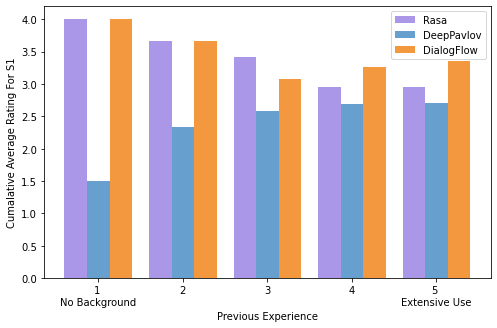

Q2: The bot was intuitive to you use and understand.


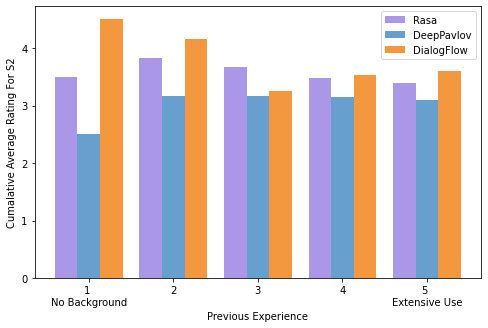

Q3: I trust the information given by this bot.


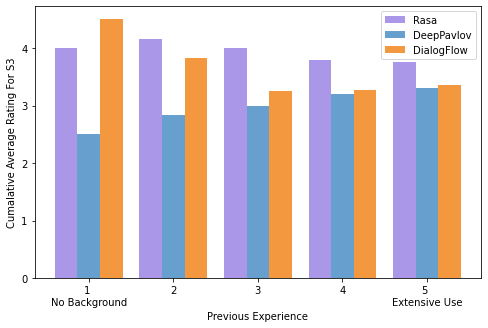

Q4: The conversation I had with this was coherent.


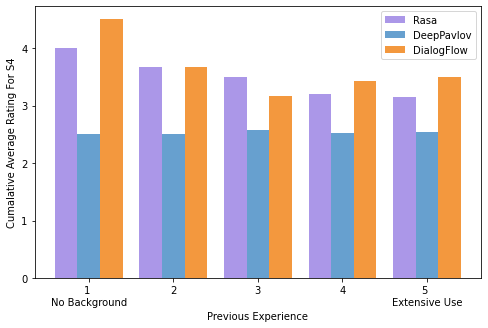

Q5: The bot responded well to random inputs.


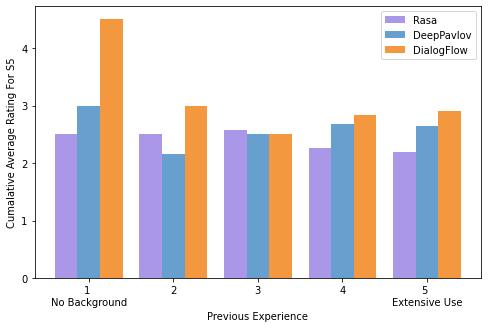

Q6: The bot understood the intents of my messages.


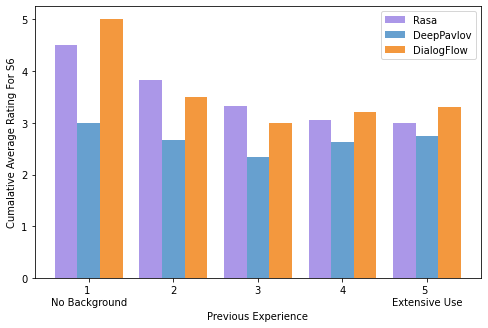

In [16]:
def cum_compare_questions(dff):
    bots = ['Q1: It was easy for me to get the information I wanted.', 
            'Q2: The bot was intuitive to you use and understand.', 
            'Q3: I trust the information given by this bot.', 
            'Q4: The conversation I had with this was coherent.', 
            'Q5: The bot responded well to random inputs.', 
            'Q6: The bot understood the intents of my messages.'
           ]
#     values = ['dont agree', 'somewhat disagre', 'neutral', 'somewhat agree', 'agree']
    values = ['1 \nNo Background', 2, 3,4 ,'5 \nExtensive Use']
    statements = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']



    for i in range(0, len(bots)):
        
        plt.figure(figsize=(8,5))
        
        rasa = []
        pav = []
        flow = []
    
        for j in range(0,len(values)):
            temp_df = dff[dff['Prior Experience'] <= j+1]
            rasa.append(temp_df['Rasa: Q'+str(i+1)].mean())
            pav.append(temp_df['DeepPavlov: Q'+str(i+1)].mean())
            flow.append(temp_df['DialogFlow: Q'+str(i+1)].mean())

#         print(levs)
        subcategorybar(values, [rasa,pav,flow])
        print(bots[i])
        plt.xlabel("Previous Experience")
        plt.ylabel("Cumalative Average Rating For " + statements[i])
        plt.legend()
        plt.show()
    
cum_compare_questions(df)

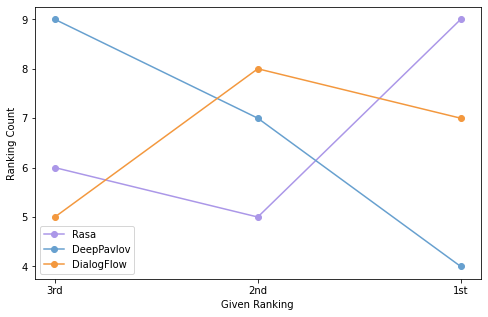

In [17]:
# TODO: show that it is most to least ranking

def ranking(dff):
    bots = ['Rasa', 'DeepPavlov', 'DialogFlow']
    colours = [RASA, DEEPPAVLOV, DIALOGFLOW]
    legend = ['Rasa', 'DeepPavlov', 'DialogFlow']

    plt.figure(figsize=(8,5))
    for i in range(0, len(bots)):

        times = dict(Counter(dff['Rate the bots in order of usability (1 is the most usable) ['+bots[i]+' Bot]']))

        counts = ['3rd', '2nd', '1st']
        values = [times[3], times[2], times[1]]

        plt.plot(counts, values, '-o', color = colours[i],  label = legend[i])
        plt.legend()
        plt.xlabel("Given Ranking")
        plt.ylabel("Ranking Count")

    plt.show()
ranking(df)       

[[ 0.  2.  4.  6.  6.]
 [ 0.  0.  0.  1.  1.]
 [ 2.  4.  8. 12. 13.]]


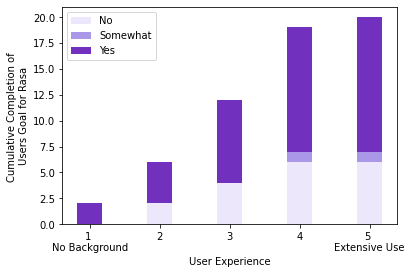

[[ 1.  3.  6. 10. 10.]
 [ 1.  3.  4.  6.  6.]
 [ 0.  0.  2.  3.  4.]]


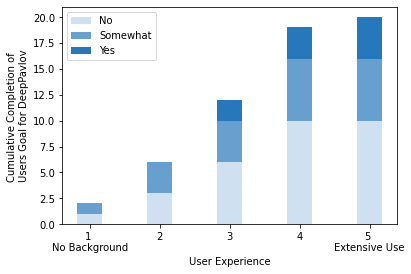

[[ 0.  1.  5.  7.  7.]
 [ 0.  1.  1.  2.  2.]
 [ 2.  4.  6. 10. 11.]]


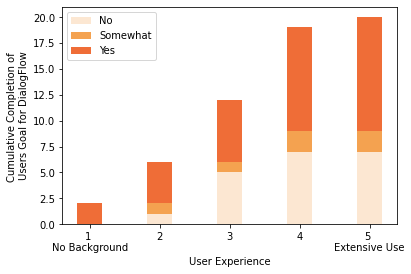

In [18]:
def desired_result_for_user_bots(dff, bot_name):
    experience = ['1 \nNo Background', '2', '3','4' ,'5 \nExtensive Use']
    labels = ['No', 'Somewhat', 'Yes']

    vals = np.array([[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0, 0.0]])

    width = 0.35       # the width of the bars: can also be len(x) sequence
    
    for i in range(0, 5):
        test_df = dff[dff['Prior Experience'] <= i+1]
        vals[0][i] = float(len(test_df[test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] == options[1]]))
        vals[1][i] = len(test_df[(test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] != options[0]) & (test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] != options[1])])
        vals[2][i] = len(test_df[test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] == options[0]])
    

    color_list = ['#fce7d2', '#f4a250', LIGHT_DF]
    if bot == 'Rasa':
        color_list = ['#ece7fa', RASA, LIGHT_RASA]
    elif bot =='DeepPavlov':
        color_list = ['#cfe1f0', DEEPPAVLOV, LIGHT_DP]
 
    # 0--> No, 1 --> other, 2 --> Yes

    print(vals)
    
    X = np.arange(vals.shape[1])
    for i in range(vals.shape[0]):
        plt.bar(experience, vals[i],width,
        bottom = np.sum(vals[:i], axis = 0),
        color = color_list[i % len(color_list)],
        label = labels[i % len(color_list)])
    
    plt.ylabel("Cumulative Completion of \nUsers Goal for " + bot_name)
    plt.xlabel("User Experience")
    plt.legend()
    plt.show()
    
for bot in ['Rasa', 'DeepPavlov', 'DialogFlow']:
    desired_result_for_user_bots(df, bot)


[[0.         0.33333333 0.33333333 0.31578947 0.3       ]
 [0.         0.         0.         0.05263158 0.05      ]
 [1.         0.66666667 0.66666667 0.63157895 0.65      ]]


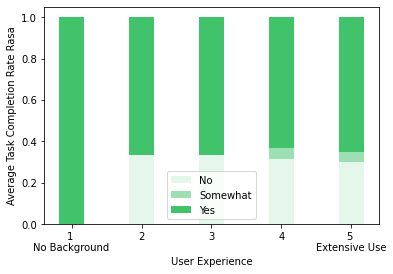

[[0.5        0.5        0.5        0.52631579 0.5       ]
 [0.5        0.5        0.33333333 0.31578947 0.3       ]
 [0.         0.         0.16666667 0.15789474 0.2       ]]


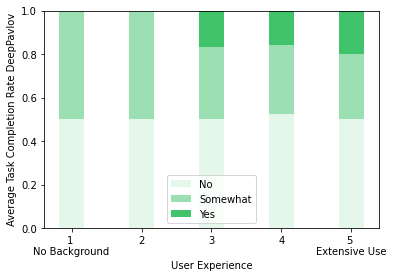

[[0.         0.16666667 0.41666667 0.36842105 0.35      ]
 [0.         0.16666667 0.08333333 0.10526316 0.1       ]
 [1.         0.66666667 0.5        0.52631579 0.55      ]]


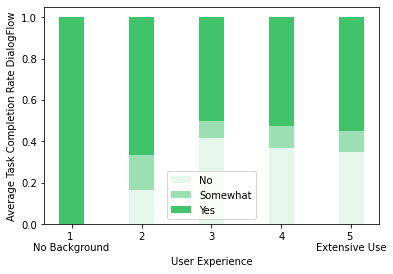

In [19]:
def average_desired_result_for_user_bots(dff, bot_name):
    experience = ['1 \nNo Background', '2', '3','4' ,'5 \nExtensive Use']
    labels = ['No', 'Somewhat', 'Yes']

    vals = np.array([[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0, 0.0]])

    width = 0.35       
    
    for i in range(0, 5):
        test_df = dff[dff['Prior Experience'] <= i+1]
        ppl = float(len(test_df))
        vals[0][i] = len(test_df[test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] == options[1]]) / ppl
        vals[1][i] = len(test_df[(test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] != options[0]) & (test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] != options[1])]) / ppl
        vals[2][i] = len(test_df[test_df[bot_name +': Was the bot able to complete the task of finding the desired restaurant'] == options[0]]) / ppl
    
    color_list = [RED, YELLOW, GREEN]
    # 0--> No, 1 --> other, 2 --> Yes

    print(vals)
    
    X = np.arange(vals.shape[1])
    for i in range(vals.shape[0]):
        plt.bar(experience, vals[i],width,
        bottom = np.sum(vals[:i], axis = 0),
        color = color_list[i % len(color_list)],
        label = labels[i % len(color_list)])
    
    plt.ylabel("Average Task Completion Rate " + bot_name)
    plt.xlabel("User Experience")
    plt.legend()
    plt.show()
    
for bot in ['Rasa', 'DeepPavlov', 'DialogFlow']:
    average_desired_result_for_user_bots(df, bot)

# Turns

In [20]:
df_turn = pd.read_csv("fresh_edited_spread - turn_calculation.csv")
df_turn

,user,rasa_turn,rasa_result,dialogflow_turn,dialogflow_result,deeppavlov_turn,deeppavlov_result
0,1,4.0,1.0,7.0,1.0,7.0,0.0
1,1,NaN,NaN,6.0,0.0,NaN,NaN
2,2,3.0,0.0,2.0,1.0,4.0,1.0
3,3,2.0,1.0,1.0,1.0,7.0,0.0
4,3,2.0,1.0,2.0,1.0,3.0,0.0
5,4,4.0,0.0,4.0,1.0,3.0,1.0
6,5,8.0,0.0,14.0,1.0,11.0,0.0
7,6,4.0,1.0,15.0,0.0,10.0,0.0
8,7,3.0,1.0,4.0,1.0,5.0,0.0
9,7,4.0,1.0,NaN,NaN,NaN,NaN


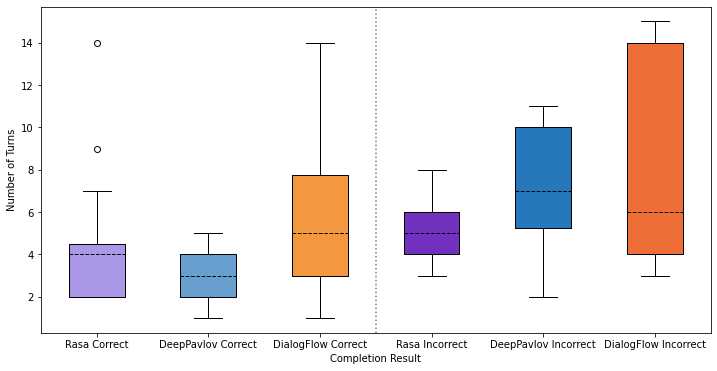

In [21]:
def boxplot_turns(df_t):
    bots = ['rasa', 'deeppavlov', 'dialogflow']
    colors = [RASA, DEEPPAVLOV,DIALOGFLOW,LIGHT_RASA, LIGHT_DP, LIGHT_DF]
    controls = ['Rasa Correct', 'DeepPavlov Correct', 'DialogFlow Correct',
                'Rasa Incorrect','DeepPavlov Incorrect', 'DialogFlow Incorrect']
    
    medianprops = dict(linestyle='--', color='black')
    
    plt.figure(figsize=(12,6)) 
    
    bigD = []

    for i in range(0, len(bots)):
        
        df_1 = df_t[df_t[bots[i]+'_result'] == 1]
        df_0 = df_t[df_t[bots[i]+'_result'] == 0]
        
        bigD.append(df_1[bots[i]+'_turn'].to_numpy())
        bigD.append(df_0[bots[i]+'_turn'].to_numpy())
        
    res = copy.deepcopy(bigD)
    res[1] = bigD[2]
    res[2] = bigD[4]
    res[3] = bigD[1]
    res[4] = bigD[3]
        
    box = plt.boxplot(res, patch_artist=True, meanline=True, medianprops=medianprops, labels = controls)
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        
    plt.axvline(x=3.5, color='grey', linestyle=':')   
    plt.ylabel("Number of Turns")
    plt.xlabel("Completion Result")
    plt.show()

boxplot_turns(df_turn)

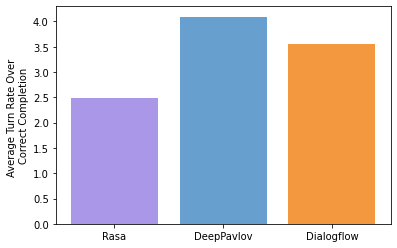

In [22]:
def scatter_turns(df_t):
    bots = ['rasa', 'deeppavlov', 'dialogflow']
    bot_names = ['Rasa', 'DeepPavlov', 'Dialogflow']

    colours = [RASA, DEEPPAVLOV, DIALOGFLOW]

    for i in range(0, len(bots)):
        out = df_t[bots[i]+'_turn'].mean()/(1+df_t[bots[i]+'_result'].mean())
        plt.bar(bot_names[i], out ,color = colours[i])
    
    plt.ylabel("Average Turn Rate Over \nCorrect Completion")
    plt.show()

scatter_turns(df_turn)

In [23]:
options = ['Yes', 'No', 'Other']